## This is a notebook for one day sampling to find out where and when the taxi drivers are staying over one place for a certain period. 


In [85]:
import numpy as np
import pylab as pl
import pandas as pd
from __future__ import print_function, division
import geopy.distance
import shapely
%pylab inline

ModuleNotFoundError: No module named 'shapely'

In [3]:
PATH = 'I:\\COF\\COF\\Analytics_and_Automation_Engineering\\bc_sample.csv'

In [4]:
# read file to csv
df1 = pd.read_csv(PATH)

In [5]:
df1.head()

,Unnamed: 0,VendorID,shl_number,hack_number,lpep_datetime,latitude,longitude,type
0,1,1,AA145,694171.0,2015-12-20 00:00:00,-73.898824,40.872401,10
1,2,1,AA423,5607672.0,2015-12-20 00:00:00,-73.997495,40.598769,10
2,3,1,AB789,0.0,2015-12-20 00:00:00,-73.947208,40.793375,10
3,4,1,AB827,5627575.0,2015-12-20 00:00:00,-73.943447,40.810679,10
4,5,1,AC295,5550312.0,2015-12-20 00:00:00,-73.931781,40.765038,10


In [6]:
# take of look of the cars
df1.sort_values(by = 'shl_number').groupby("shl_number").count().head() # how many cars was

,Unnamed: 0,VendorID,hack_number,lpep_datetime,latitude,longitude,type
shl_number,,,,,,,
AA001,419,419,419,419,419,419,419
AA002,358,358,358,358,358,358,358
AA003,373,373,373,373,373,373,373
AA004,254,254,254,254,254,254,254
AA005,139,139,139,139,139,139,139


In [7]:
# sort the table with car id and time
df_sort = df1.sort_values(by = ['shl_number', 'lpep_datetime'])

In [8]:
## calculate distance from coordinates
# dist = gpxpy.geo.haversine_distance(lat1, lon1, lat2, lon2)
lis = []
# Vincenty, with an accurate ellipsoidal model of the earth.
for i in range(len(df_sort)):
    if i > 0:
        coords_1 = (df_sort['latitude'].values[i-1], df_sort['longitude'].values[i-1])
        coords_2 = (df_sort['latitude'].values[i], df_sort['longitude'].values[i])
        lis.append(geopy.distance.vincenty(coords_1, coords_2).km) 
        
        


In [9]:
len(df_sort)

1980810

In [10]:
# the distance between n points, the number of distance is n-1, so we insert a number 0 to the first of the list.
lis.insert(0, 0) 

In [11]:
len(lis) # make sure the length of list is equal to length of the data frame

1980810

In [107]:
df_new = df_sort.copy()
df_new["distance"] = np.array(lis)*1000

In [132]:
df_new['lpep_datetime'] = pd.to_datetime(df_new['lpep_datetime'])
#df_new['delta_datetime'] = df_new['new_datetime'].dt.minute

In [133]:
df_new['lpep_datetime'].iloc[4] - df_new['lpep_datetime'].iloc[3]

Timedelta('0 days 00:02:00')

In [ ]:
datetime.timedelta(1)

In [123]:
#df_new["time_diff"]= np.array(range(len(df_new)))
df_new

,Unnamed: 0,VendorID,shl_number,hack_number,lpep_datetime,latitude,longitude,type,distance,new_datetime
1039,1040,2,AA001,0.0,2015-12-20 00:00:42,40.842333,-73.931205,10,0.000000,0
5274,5275,2,AA001,0.0,2015-12-20 00:02:42,40.833033,-73.939413,10,1243.340365,2
8763,8764,2,AA001,0.0,2015-12-20 00:04:42,40.839017,-73.937195,10,690.300222,4
11712,11713,2,AA001,0.0,2015-12-20 00:07:03,40.839138,-73.937217,10,13.627233,7
20356,20357,2,AA001,0.0,2015-12-20 00:09:03,40.839018,-73.937178,10,13.713990,9
16776,16777,2,AA001,0.0,2015-12-20 00:11:03,40.839290,-73.937122,10,30.547784,11
26608,26609,2,AA001,0.0,2015-12-20 00:13:03,40.839095,-73.937115,10,21.662278,13
26469,26470,2,AA001,0.0,2015-12-20 00:15:03,40.839273,-73.937300,10,25.209143,15
32565,32566,2,AA001,0.0,2015-12-20 00:17:04,40.838878,-73.937237,10,44.188747,17
34999,35000,2,AA001,0.0,2015-12-20 00:19:03,40.839208,-73.937262,10,36.707369,19


In [96]:
#df_new.groupby("shl_number").count()

,Unnamed: 0,VendorID,hack_number,lpep_datetime,latitude,longitude,type,distance,time_diff
shl_number,,,,,,,,,
AA001,419,419,419,419,419,419,419,419,419
AA002,358,358,358,358,358,358,358,358,358
AA003,373,373,373,373,373,373,373,373,373
AA004,254,254,254,254,254,254,254,254,254
AA005,139,139,139,139,139,139,139,139,139
AA006,241,241,241,241,241,241,241,241,241
AA007,390,390,390,390,390,390,390,390,390
AA008,242,242,242,242,242,242,242,242,242
AA010,222,222,222,222,222,222,222,222,222


In [117]:
df_new.new_datetime[4]

Timestamp('2015-12-20 00:00:00')

In [ ]:
# time series
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
df_bike_monthly_=df_bike_monthly.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])

In [30]:
import datetime

df_stop["lpep_datetime"].to_datetime

AttributeError: 'Series' object has no attribute 'to_datetime'

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


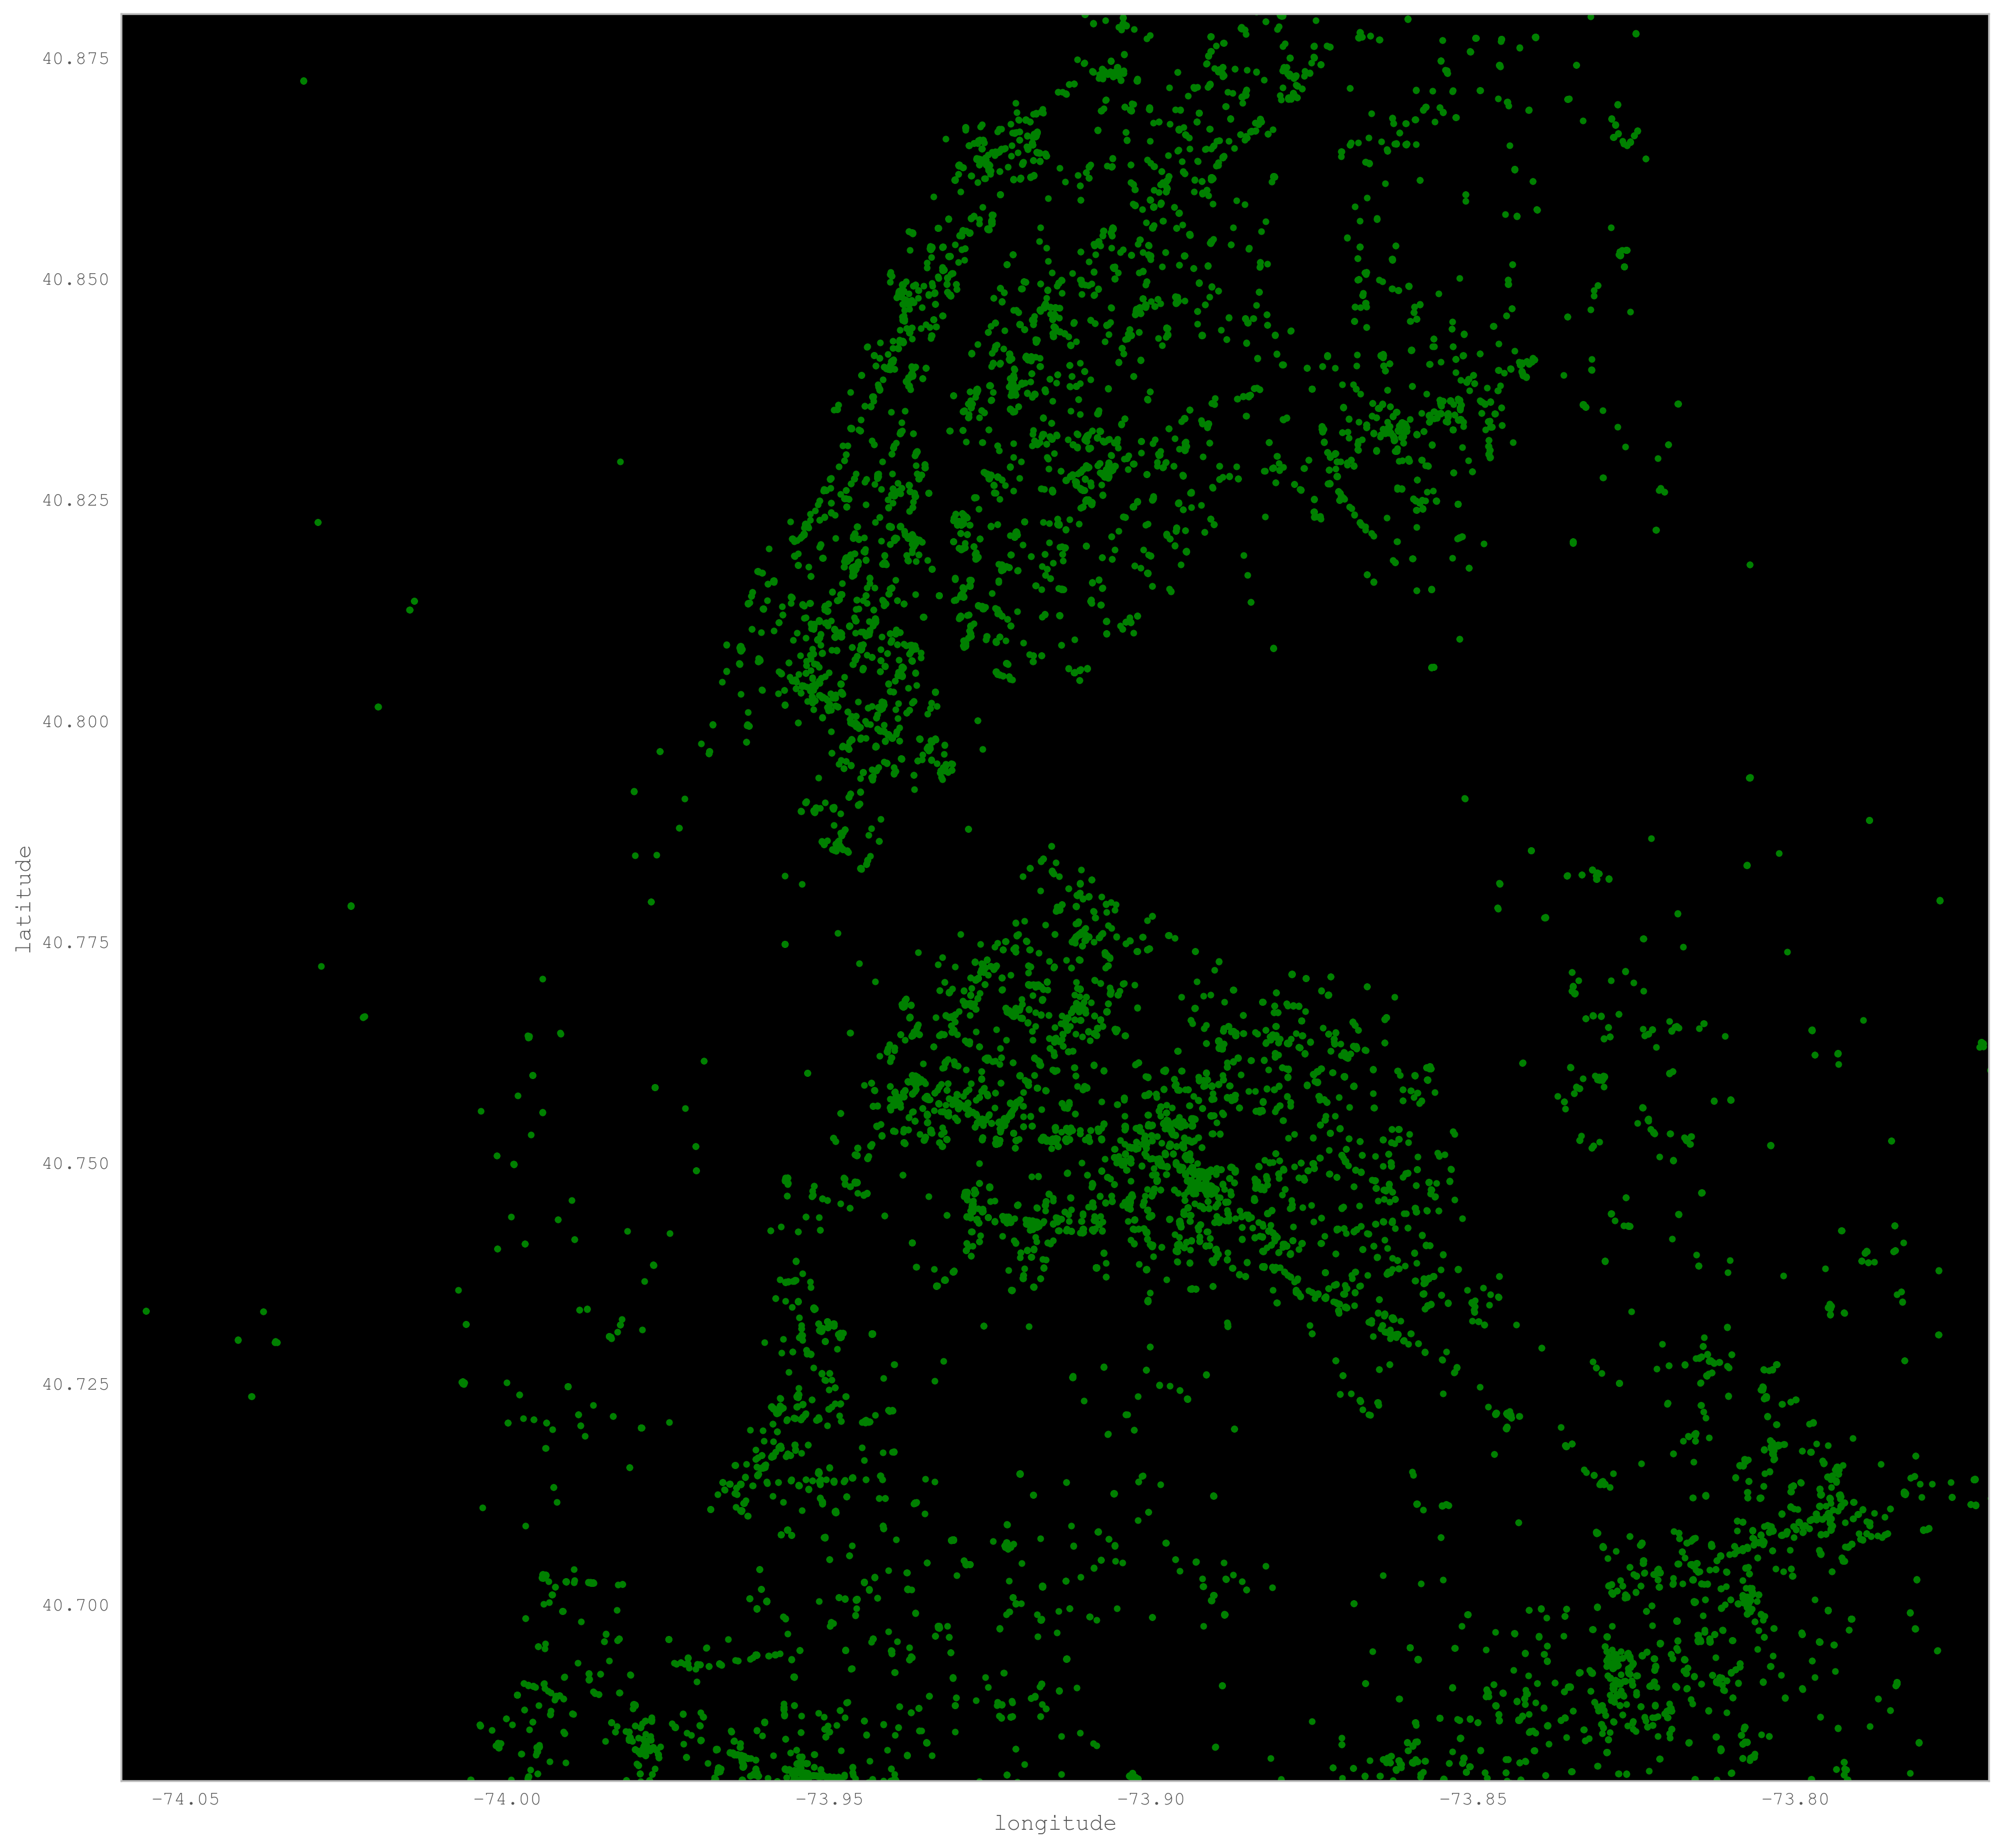

In [93]:
from matplotlib import rcParams 
pd.options.display.mpl_style = 'default' #Better Styling  
new_style = {'grid': False} #Remove grid  Decimal Degrees:
# Latitude: 40.7745457
# Longitude: -73.9718052
matplotlib.rc('axes', **new_style)  
 
rcParams['figure.figsize'] = (17.5, 17) 
rcParams['figure.dpi'] = 250


# (lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])
P=df_tem_more_3.plot(kind='scatter', x='longitude', y='latitude',color='green',xlim=(-74.06,-73.77),ylim=(40.68, 40.88),s=9,alpha=1)
#P2=df_new.plot(kind='scatter', x='longitude', y='latitude',color='green',xlim=(-74.06,-73.77),ylim=(40.65, 40.8),s=9,alpha=1)


P.set_axis_bgcolor('black') #Background Color

In [137]:
df_tem_more_3.to_csv("bc_taxi_relief_time_sample_12-20.csv")

In [136]:
df_tem_more_3

,Unnamed: 0,VendorID,shl_number,hack_number,lpep_datetime,latitude,longitude,type,distance,time_diff
281608,281609,2,AA001,0.0,2015-12-20 02:40:10,40.846822,-73.901090,10,0.640638,75
319074,319075,2,AA001,5253054.0,2015-12-20 03:03:21,40.839032,-73.937133,10,2.355801,86
322084,322085,2,AA001,5253054.0,2015-12-20 03:07:22,40.838972,-73.937132,10,1.683354,88
328179,328180,2,AA001,0.0,2015-12-20 03:09:21,40.839018,-73.937142,4,0.000000,90
329257,329258,2,AA001,0.0,2015-12-20 03:09:22,40.839025,-73.937143,10,0.785050,91
492606,492607,2,AA001,5253054.0,2015-12-20 05:29:27,40.843948,-73.901935,10,1.251543,145
498430,498431,2,AA001,0.0,2015-12-20 05:33:27,40.843948,-73.901937,10,1.880921,149
653930,653931,2,AA001,5253054.0,2015-12-20 09:11:55,40.870885,-73.913240,10,1.696514,246
656385,656386,2,AA001,5253054.0,2015-12-20 09:15:56,40.870928,-73.913327,10,2.639107,248
662215,662216,2,AA001,5253054.0,2015-12-20 09:17:56,40.870908,-73.913325,10,2.225647,249
